In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

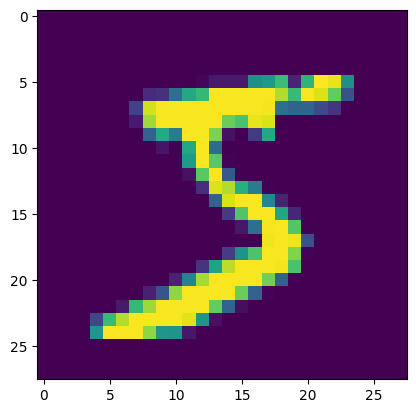

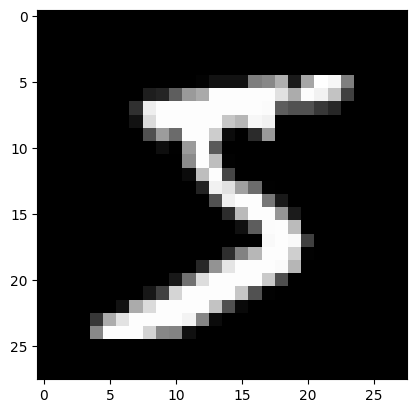

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = 'gray')


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

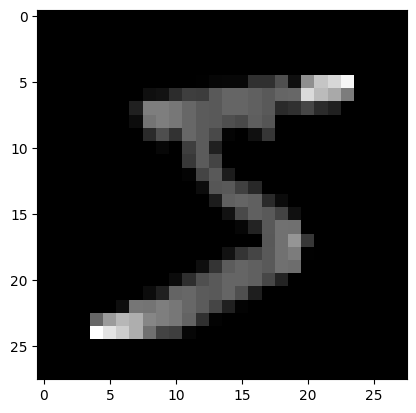

In [ ]:
x_train = tf.keras.utils.normalize(x_train,axis =1)
x_test = tf.keras.utils.normalize(x_train,axis =1)
plt.imshow(x_train[0],cmap = 'gray')
print(x_train[0])

In [ ]:
print(y_train[0])

5


In [ ]:
import numpy as np
img_size = 28
x_trainr = np.array(x_train).reshape(-1, img_size, img_size,1)
x_testr = np.array(x_test).reshape(-1, img_size, img_size,1)
print("Trnaining sample dimanssion",x_trainr.shape)
print("Testing sample dimanssion",x_testr.shape)

Trnaining sample dimanssion (60000, 28, 28, 1)
Testing sample dimanssion (60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 activation_21 (Activation)  (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 activation_22 (Activation)  (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                

In [ ]:
print("total training samples",len(x_trainr))

total training samples 60000


In [ ]:
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
model.fit(x_trainr, y_train, epochs=5, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 8s 6ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0989
Epoch 2/5
1313/1313 [==============================] - 9s 6ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0989
Epoch 3/5
1313/1313 [==============================] - 8s 6ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0989
Epoch 4/5
1313/1313 [==============================] - 7s 5ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0989
Epoch 5/5
1313/1313 [==============================] - 8s 6ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.0989


In [ ]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
print("Test loss on 10000 test samples",test_loss)
print("validation Accurace on 10000 test samples",test_acc)

ValueError: Data cardinality is ambiguous:
  x sizes: 60000
  y sizes: 10000
Make sure all arrays contain the same number of samples.

In [ ]:
predictions = model.predict([x_testr])
print(predictions)

1875/1875 [==============================] - 4s 2ms/step
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [ ]:
print(np.argmax(predictions[3]))

0
